# Potato Disease Classification

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers # type: ignore
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'datasets/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse", 
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'datasets/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [7]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'datasets/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [8]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break 

[[[0.5690926  0.50242585 0.53379846]
  [0.49074757 0.4240809  0.45545346]
  [0.6993466  0.63267994 0.6640525 ]
  ...
  [0.65060973 0.58394307 0.6153156 ]
  [0.65714276 0.5904761  0.62184864]
  [0.66367584 0.5970092  0.6283817 ]]

 [[0.5786744  0.51200765 0.54338026]
  [0.4994583  0.43279165 0.4641642 ]
  [0.6740855  0.6074188  0.6387913 ]
  ...
  [0.8136626  0.7526496  0.7811953 ]
  [0.83631045 0.7761686  0.80427873]
  [0.8589584  0.79968756 0.8273622 ]]

 [[0.5882562  0.52158946 0.552962  ]
  [0.50816905 0.44150236 0.47287494]
  [0.6488244  0.58215773 0.6135303 ]
  ...
  [0.7612875  0.702464   0.72991496]
  [0.7443016  0.6854781  0.71292907]
  [0.72731566 0.66849214 0.6959431 ]]

 ...

 [[0.6635339  0.6047104  0.6321614 ]
  [0.6718091  0.61298555 0.64043653]
  [0.6800843  0.62126076 0.64871174]
  ...
  [0.71034807 0.647603   0.68681866]
  [0.72366095 0.6642     0.7034157 ]
  [0.68164283 0.63066244 0.6698781 ]]

 [[0.7324388  0.6733916  0.7015135 ]
  [0.7306966  0.67121387 0.70064247]


## Building the Model

In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [11]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [12]:
1506/32

47.0625

In [13]:
215/32

6.71875

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20


47/47 [==============================] - 52s 1s/step - loss: 0.9128 - accuracy: 0.4783 - val_loss: 0.8580 - val_accuracy: 0.6927
Epoch 2/20
47/47 [==============================] - 91s 2s/step - loss: 0.8115 - accuracy: 0.6058 - val_loss: 0.7450 - val_accuracy: 0.6510
Epoch 3/20
47/47 [==============================] - 122s 3s/step - loss: 0.6381 - accuracy: 0.7137 - val_loss: 0.5930 - val_accuracy: 0.7500
Epoch 4/20
47/47 [==============================] - 125s 3s/step - loss: 0.5503 - accuracy: 0.7782 - val_loss: 0.5158 - val_accuracy: 0.7865
Epoch 5/20
47/47 [==============================] - 121s 3s/step - loss: 0.3134 - accuracy: 0.8786 - val_loss: 0.2869 - val_accuracy: 0.8958
Epoch 6/20
47/47 [==============================] - 115s 2s/step - loss: 0.3872 - accuracy: 0.8446 - val_loss: 0.3015 - val_accuracy: 0.9167
Epoch 7/20
47/47 [==============================] - 128s 3s/step - loss: 0.2206 - accuracy: 0.9206 - val_loss: 0.2456 - val_accuracy: 0.9115
Epoch 8/20
47

In [15]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 21s 1s/step - loss: 0.2584 - accuracy: 0.9118


In [16]:
scores

[0.2584173381328583, 0.9118329286575317]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [17]:
history

In [18]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
type(history.history['loss'])

list

In [21]:
len(history.history['loss'])

20

In [ ]:
history.history['loss'][:5] 

[0.9127784371376038,
 0.8114966750144958,
 0.6381113529205322,
 0.5502710938453674,
 0.313358336687088]

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [24]:
val_acc

[0.6927083134651184,
 0.6510416865348816,
 0.75,
 0.7864583134651184,
 0.8958333134651184,
 0.9166666865348816,
 0.9114583134651184,
 0.8802083134651184,
 0.7447916865348816,
 0.875,
 0.9739583134651184,
 0.9479166865348816,
 0.9583333134651184,
 0.9322916865348816,
 0.9479166865348816,
 0.9427083134651184,
 0.9427083134651184,
 0.9739583134651184,
 0.9270833134651184,
 0.8958333134651184]

In [25]:
acc

[0.4782903790473938,
 0.6058344841003418,
 0.7137042284011841,
 0.7781546711921692,
 0.8785617351531982,
 0.8446404337882996,
 0.9206241369247437,
 0.9002713561058044,
 0.9213025569915771,
 0.9179104566574097,
 0.9592944383621216,
 0.9518317580223083,
 0.9633650183677673,
 0.9715061187744141,
 0.9567819237709045,
 0.9470827579498291,
 0.9640434384346008,
 0.9837177991867065,
 0.9647218585014343,
 0.9626865386962891]

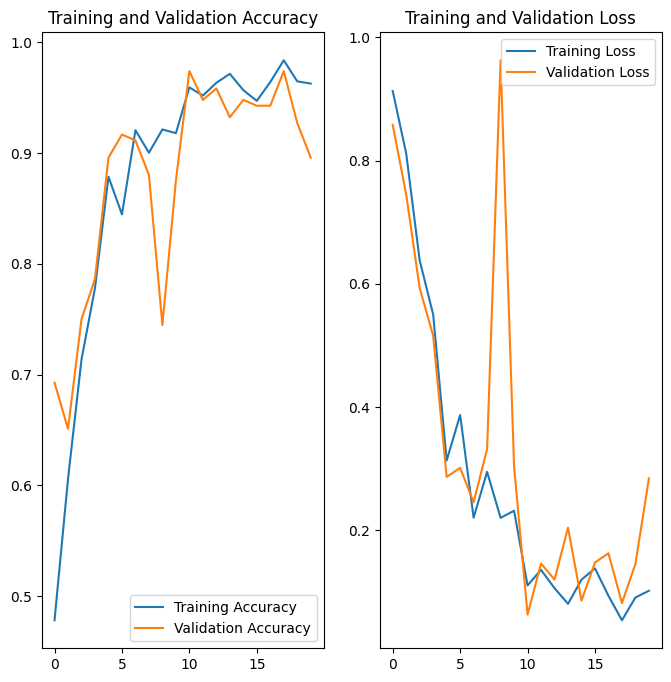

In [26]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict
actual label: Potato___Late_blight
1/1 [==============================] - 1s 1s/step
predicted label: Potato___Late_blight


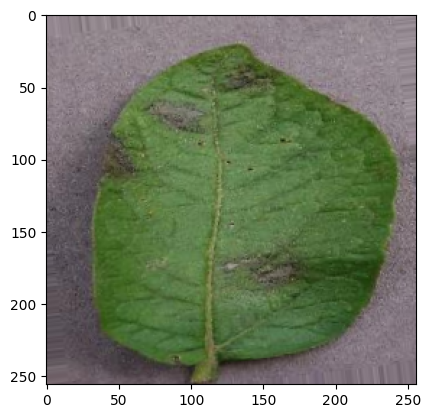

In [27]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Inference on few sample images**

1/1 [==============================] - 0s 74ms/step


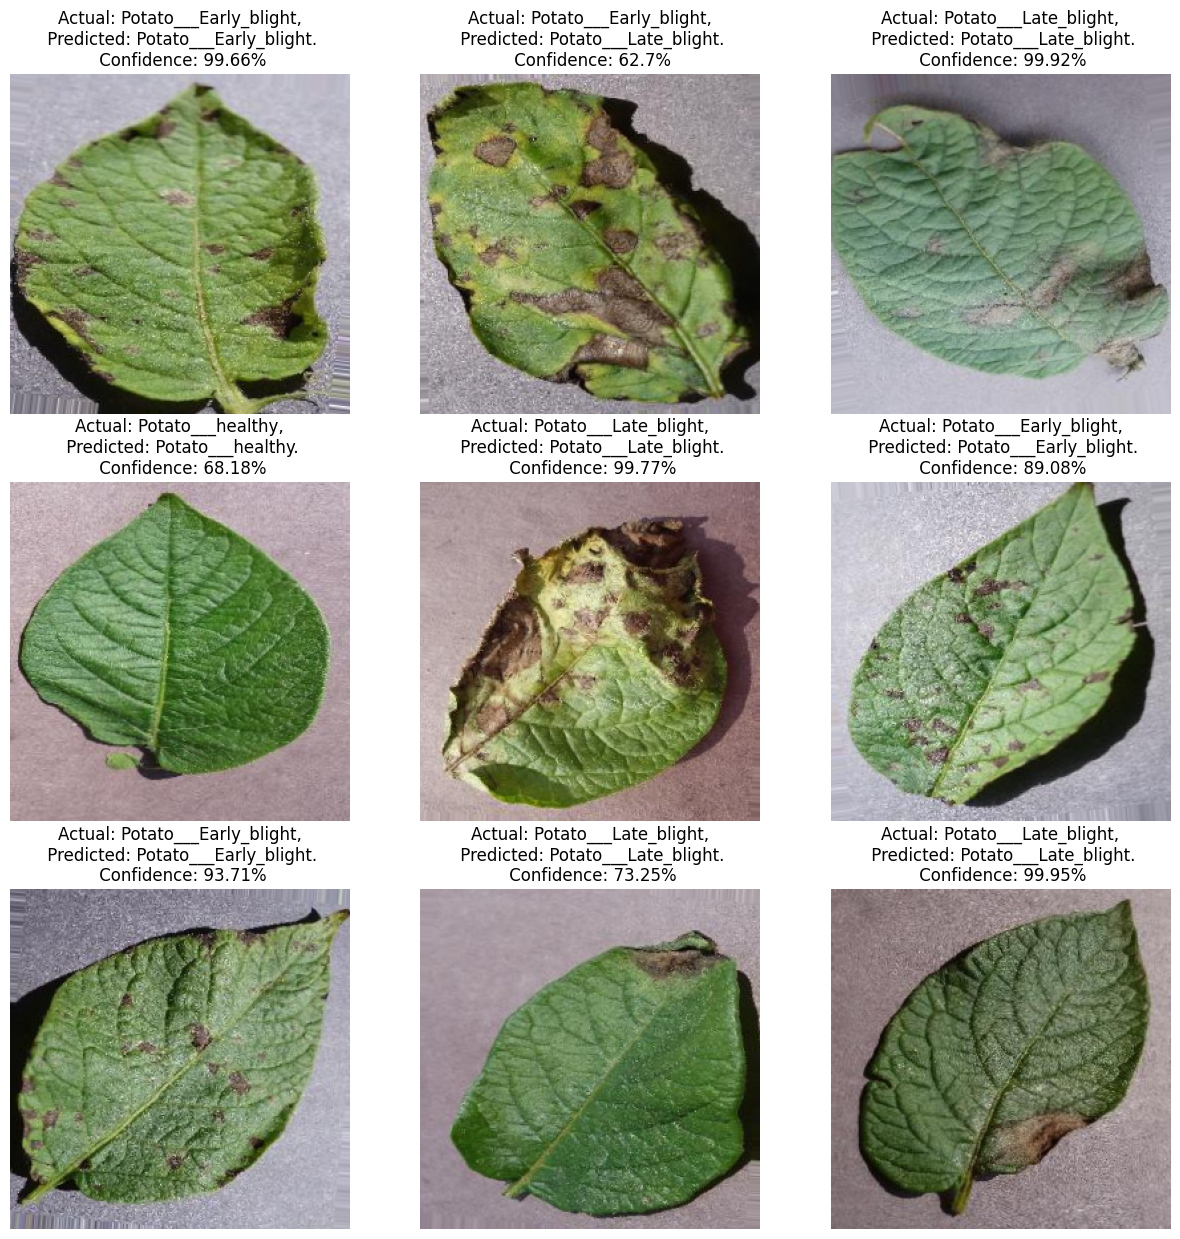

In [29]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

In [30]:
model.save("../potato_model.h5")

c:\Users\R. Subrahmanyam\Downloads\potato-disease-classification-main\venv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
